# AI - CA0
## Goal: Manipulating dataset with help of statistic analysis to handle missing data
## Abstract: In this project, we use linear regression to predict the target data that is missed. In this process, we manipulate data of some features that may effect on target data. If there is any missed data among features data, we try to use appropriate statistic to fill them up.(like mean or mode). Finally we choose the best feature for using in linear regression and predicting target data


#### importing necessary libraries:

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Q1

Loading project data set:

In [333]:
df = pd.read_csv("FuelConsumptionCo2.csv", index_col=0)

In [334]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33,196.0
1,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29,221.0
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48,136.0
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25,NaN
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27,244.0


_head_ function return fist _n_ rows of data set. we can specify _n_ in argument. dufault is 5.

In [335]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24,271.0
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,13.2,9.5,11.5,25,264.0
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24,271.0
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,12.9,9.3,11.3,25,260.0
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6.0,AS6,X,14.9,10.2,12.8,22,294.0


_tail_ function behaves similar to head fucntion. It returns _n_ last rows of data set.

In [336]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1040.000000,1033.000000,1067.000000,1067.000000,1067.000000,1067.000000,964.000000
mean,2014.0,3.324038,5.797677,13.296532,9.474602,11.580881,26.441425,256.741701
std,0.0,1.411400,1.807262,4.101253,2.794510,3.485595,7.468702,63.265308
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,209.000000
50%,2014.0,3.300000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.200000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,437.000000


As you can see above, _describe_ function shows some statistic information about each attribute or feature(column) of data set

### Q2

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1058 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1040 non-null   float64
 5   CYLINDERS                 1033 non-null   float64
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  996 non-null    object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              964 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 116.7+ KB


#### Label encoding on "FUELTYPE" atribute:

In [338]:
label_codes = {"FUELTYPE": {"D": 0, "E": 1, "X": 2, "Z": 3} }
df = df.replace(label_codes)
df["FUELTYPE"] = df["FUELTYPE"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 1067 non-null   int64   
 1   MAKE                      1067 non-null   object  
 2   MODEL                     1058 non-null   object  
 3   VEHICLECLASS              1067 non-null   object  
 4   ENGINESIZE                1040 non-null   float64 
 5   CYLINDERS                 1033 non-null   float64 
 6   TRANSMISSION              1067 non-null   object  
 7   FUELTYPE                  996 non-null    category
 8   FUELCONSUMPTION_CITY      1067 non-null   float64 
 9   FUELCONSUMPTION_HWY       1067 non-null   float64 
 10  FUELCONSUMPTION_COMB      1067 non-null   float64 
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 12  CO2EMISSIONS              964 non-null    float64 
dtypes: category(1), float64(6), int64(2), object(4)


For label encoding, we used _replace_ function with this mapping: (D -> 0, E -> 1, X -> 2, Z -> 3). Note that the Dtpe is still categorical; So any numerical operation is not valid.

### Q3

#### Showing number of NaN values for each column:

In [339]:
df.isna().sum()

MODELYEAR                     0
MAKE                          0
MODEL                         9
VEHICLECLASS                  0
ENGINESIZE                   27
CYLINDERS                    34
TRANSMISSION                  0
FUELTYPE                     71
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64

#### Filling NaN values with mean value for numerical columns:

In [340]:
numerical_cols = {"ENGINESIZE", "CYLINDERS"}
df = df.apply(lambda col: col.fillna(value=np.round(col.mean())) if col.name in numerical_cols else col)

There was only two numerical columns with NaN values that we filled them with mean value of column. we used _round_ function to acheive rational data for columns(for example CYLINDERS cannot be float)

#### Pros and Cons for using mean:
One benifit of usnig mean is that you fill missed data with overall average of population; In facat, with this method, this missed data represent the average of remain population. But this is not percise; Maybe this missed data is not close to mean value; Maybe with this work, unwanted bias happens and  distribution of data changes.

#### Filling NaN values with mode value for categorical columns:

In [341]:
categorial_cols = {"MODEL", "FUELTYPE"}
df = df.apply(lambda col: col.fillna(value=col.mode()[0]) if col.name in categorial_cols else col)

There was only two categorical columns with NaN values that we filled them with mode value of column.

In [342]:
df.isna().sum()

MODELYEAR                     0
MAKE                          0
MODEL                         0
VEHICLECLASS                  0
ENGINESIZE                    0
CYLINDERS                     0
TRANSMISSION                  0
FUELTYPE                      0
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64

There is no NaN vlue in features data

### Making Train/Test dataframe

In [343]:
train_df = df[~df["CO2EMISSIONS"].isna()]
test_df = df[df["CO2EMISSIONS"].isna()]

### Q4

In [344]:
# Related to Q5(importing time module for measuring exe time)
from time import time
exe_time1 = time()
###################

print("City fuel consumption with CO2 Less than 240: ", train_df[train_df["CO2EMISSIONS"] < 240]["FUELCONSUMPTION_CITY"].mean())
print("City fuel consumption with CO2 More than 300: ", train_df[train_df["CO2EMISSIONS"] > 300]["FUELCONSUMPTION_CITY"].mean())

# RElated to Q5(measuring exe time)
exe_time1 = time() - exe_time1

City fuel consumption with CO2 Less than 240:  10.03781902552204
City fuel consumption with CO2 More than 300:  18.663255813953487


In this part, we used pandas features for filtering

### Q5

In [345]:
# measuring exe time
exe_time2 = time()

# Less than 240
count = 0
sum_of_fuel_consumption_240 = 0
for i in range(len(train_df)):
    if train_df.iloc[i]["CO2EMISSIONS"] < 240:
        sum_of_fuel_consumption_240 += train_df.iloc[i]["FUELCONSUMPTION_CITY"]
        count += 1
mean_240 = sum_of_fuel_consumption_240 / count

# More than 300
count = 0
sum_of_fuel_consumption_300 = 0
for i in range(len(train_df)):
    if train_df.iloc[i]["CO2EMISSIONS"] > 300:
        sum_of_fuel_consumption_300 += train_df.iloc[i]["FUELCONSUMPTION_CITY"]
        count += 1
mean_300 = sum_of_fuel_consumption_300 / count

# measuring exe time
exe_time2 = time() - exe_time2

print("City fuel consumption with CO2 Less than 240(without vectorization): ", mean_240)
print("City fuel consumption with CO2 More than 300(without vectorization): ", mean_300)

City fuel consumption with CO2 Less than 240(without vectorization):  10.037819025522042
City fuel consumption with CO2 More than 300(without vectorization):  18.663255813953487


In [346]:
print("Execution time with vectorization: %s miliseconds" % (exe_time1 * 1000))
print("Execution time without vectorization: %s miliseconds" % (exe_time2 * 1000))

Execution time with vectorization: 6.749629974365234 miliseconds
Execution time without vectorization: 371.3817596435547 miliseconds


As you can see, in Q5, because we did not use vectorization, exectuion time is much more than execution time in Q4.

### Q6

In [347]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 964 non-null    int64   
 1   MAKE                      964 non-null    object  
 2   MODEL                     964 non-null    object  
 3   VEHICLECLASS              964 non-null    object  
 4   ENGINESIZE                964 non-null    float64 
 5   CYLINDERS                 964 non-null    float64 
 6   TRANSMISSION              964 non-null    object  
 7   FUELTYPE                  964 non-null    category
 8   FUELCONSUMPTION_CITY      964 non-null    float64 
 9   FUELCONSUMPTION_HWY       964 non-null    float64 
 10  FUELCONSUMPTION_COMB      964 non-null    float64 
 11  FUELCONSUMPTION_COMB_MPG  964 non-null    int64   
 12  CO2EMISSIONS              964 non-null    float64 
dtypes: category(1), float64(6), int64(2), object(4)
m

Text(0, 0.5, 'Frequncy')

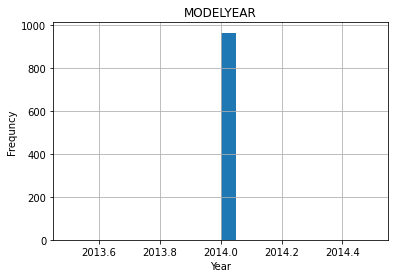

In [348]:
train_df.hist(column="MODELYEAR", bins=20)
plt.xlabel("Year")
plt.ylabel("Frequncy")

Form this plot we can obseve that MODELYEAR data has just one value

Text(0, 0.5, 'Frequncy')

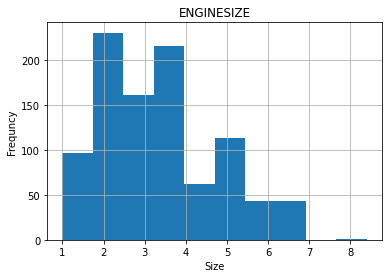

In [349]:
train_df.hist(column="ENGINESIZE")
plt.xlabel("Size")
plt.ylabel("Frequncy")

Form this plot we can obseve that distribution of ENGINESIZE is approximately normal

Text(0, 0.5, 'Frequncy')

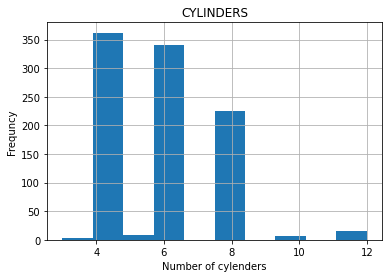

In [350]:
train_df.hist(column="CYLINDERS")
plt.xlabel("Number of cylenders")
plt.ylabel("Frequncy")

Form this plot we can obseve that most of populatinon have 4 or 6 or 8 cylinders

Text(0, 0.5, 'Frequncy')

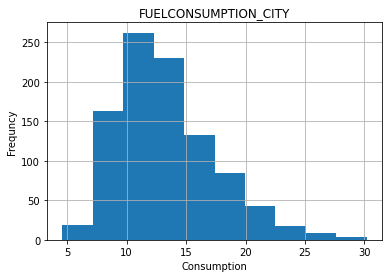

In [351]:
train_df.hist(column="FUELCONSUMPTION_CITY")
plt.xlabel("Consumption")
plt.ylabel("Frequncy")

Form this plot we can obseve that distribution of FUELCONSUMPTION_CITY is approximately normal wtih little Skewness to the left.

Text(0, 0.5, 'Frequncy')

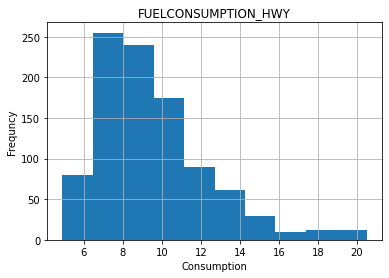

In [352]:
train_df.hist(column="FUELCONSUMPTION_HWY")
plt.xlabel("Consumption")
plt.ylabel("Frequncy")

Form this plot we can obseve that distribution of FUELCONSUMPTION_HWY is approximately normal wtih little Skewness to the left.

Text(0, 0.5, 'Frequncy')

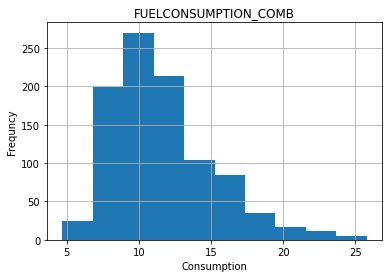

In [353]:
train_df.hist(column="FUELCONSUMPTION_COMB")
plt.xlabel("Consumption")
plt.ylabel("Frequncy")

Form this plot we can obseve that distribution of FUELCONSUMPTION_COMB is approximately normal wtih little Skewness to the left.

Text(0, 0.5, 'Frequncy')

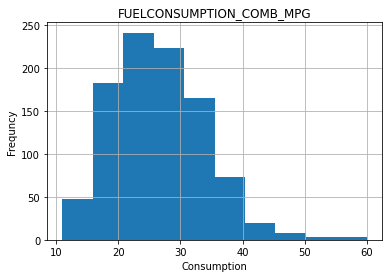

In [354]:
train_df.hist(column="FUELCONSUMPTION_COMB_MPG")
plt.xlabel("Consumption")
plt.ylabel("Frequncy")

Form this plot we can obseve that distribution of FUELCONSUMPTION_COMB_MPG is approximately normal wtih little Skewness to the left.

Text(0, 0.5, 'Frequncy')

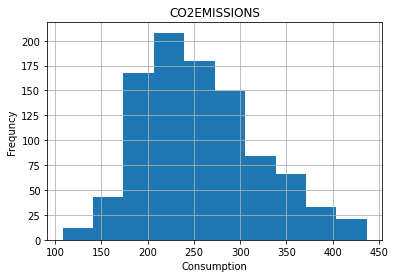

In [355]:
train_df.hist(column="CO2EMISSIONS")
plt.xlabel("Consumption")
plt.ylabel("Frequncy")


Form this plot we can obseve that distribution of FUELCONSUMPTION_COMB_MPG is approximately normal.

#### Droping categorical columns:

In [356]:
to_drop = {"MAKE", "MODEL", "VEHICLECLASS", "TRANSMISSION", "FUELTYPE"}
train_df = train_df.drop(labels=to_drop, axis=1)
test_df = test_df.drop(labels=to_drop, axis=1)

### Q7

In [357]:
train_df_normal = train_df.apply(lambda col : (col - col.mean())/col.std() if col.name != "MODELYEAR" else col)
train_df_normal

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,-0.966503,-1.027487,-0.833605,-0.994870,-0.888216,0.886286,-0.960111
1,2014,-0.676860,-1.027487,-0.519842,-0.641939,-0.576247,0.352882,-0.564949
2,2014,-1.328556,-1.027487,-1.774893,-1.312508,-1.625596,2.886552,-1.908498
4,2014,0.119658,0.096801,-0.302621,-0.289008,-0.292640,0.086180,-0.201401
5,2014,0.119658,0.096801,-0.350893,-0.641939,-0.462804,0.219531,-0.422691
...,...,...,...,...,...,...,...,...
1062,2014,-0.242396,0.096801,0.011141,0.099216,0.047690,-0.313873,0.225373
1063,2014,-0.097574,0.096801,-0.037130,-0.006663,-0.037393,-0.180522,0.114728
1064,2014,-0.242396,0.096801,0.011141,0.099216,0.047690,-0.313873,0.225373
1065,2014,-0.097574,0.096801,-0.109537,-0.077249,-0.094114,-0.180522,0.051502


we did not normalize "MODELYEAR" colmn, because it has only one value (which is 2014) so standard deviation is 0. Also because it has one value, it is not useful in predicting output.

### Q8

Text(0.5, 1.0, 'CO2EMISSIONS based on MODELYEAR')

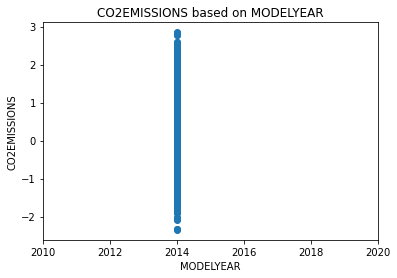

In [358]:
plt.scatter(train_df_normal["MODELYEAR"], train_df_normal["CO2EMISSIONS"])
plt.xlim(2010, 2020)
plt.xlabel("MODELYEAR")
plt.ylabel("CO2EMISSIONS")
plt.title("CO2EMISSIONS based on MODELYEAR")

This is obvious from this plot that "MODELYEAR" is not good for predicting

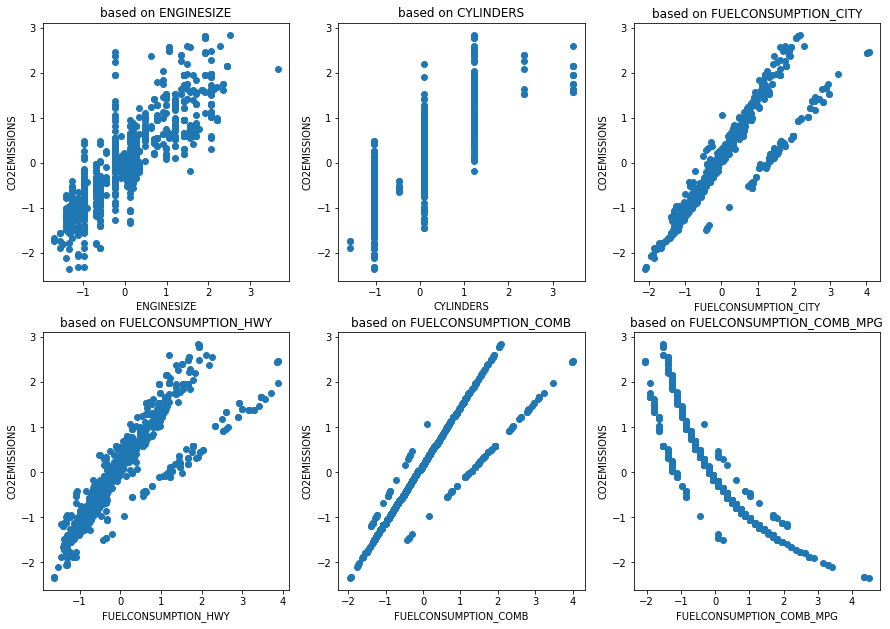

In [359]:
fig, axes = plt.subplots(2,3, figsize=(15, 9))
axes = axes.reshape(-1)

atributes = train_df_normal.keys()
for ind in range(atributes.size-2):
    axes[ind].scatter(train_df_normal[atributes[ind+1]], train_df_normal["CO2EMISSIONS"])
    axes[ind].set_xlabel(atributes[ind+1])
    axes[ind].set_ylabel("CO2EMISSIONS")
    axes[ind].set_title("based on " + atributes[ind+1])

plt.subplots_adjust(top=1)


### B)
we use "FUELCONSUMPTION_COMB" atribute to predict. Because we are going to predict output with linear predictor, and output("CO2MISSIONS") has more linear relation with this attribute, compare to others(at least with unarmed eye). Also, spots of  related plot of this attribute (bottom middle) have less deviation(after ignoring noisy spots)

### Q9 & 10

#### building new DataFrame:

In [360]:
train = train_df_normal[["FUELCONSUMPTION_COMB", "CO2EMISSIONS"]].copy()
train

,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,-0.888216,-0.960111
1,-0.576247,-0.564949
2,-1.625596,-1.908498
4,-0.292640,-0.201401
5,-0.462804,-0.422691
...,...,...
1062,0.047690,0.225373
1063,-0.037393,0.114728
1064,0.047690,0.225373
1065,-0.094114,0.051502


For finding(theta0 and theta1) features of this linear regression, we use normal equation method.
This is the formula of normal equation: $(X^TX)^{-1}.(X^Ty)$ which X is feature data and y is labeled data

In [361]:
X = np.c_[np.ones(train.shape[0]), train["FUELCONSUMPTION_COMB"]]
y = train["CO2EMISSIONS"].to_numpy()

In [362]:
from numpy.linalg import inv

X_transpose = np.transpose(X)
theta = np.matmul(np.matmul(inv(np.matmul(X_transpose, X)),X_transpose),y)
theta

array([2.75821033e-16, 8.88687103e-01])

#### Now calculating MSE:

In [363]:
MSE = np.square(y - np.matmul(X, theta)).sum() / len(y)
MSE

0.2100171470129475

As you can see, MSE is less than 0.5

### Q11

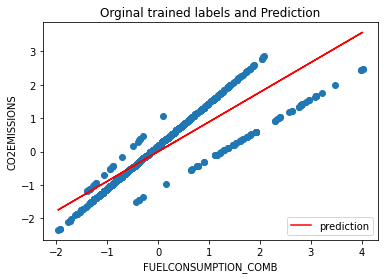

In [364]:
plt.scatter(train["FUELCONSUMPTION_COMB"], train["CO2EMISSIONS"])
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.title("Orginal trained labels and Prediction")

prediction = np.matmul(X, theta)
plt.plot(train["FUELCONSUMPTION_COMB"], prediction, c="red", label="prediction")
plt.legend(loc="lower right")

As you can see, predicted values, are approximately good and they are near orginal values. In low values of horizontal axis, the predicted values are approximatey as same as orginal values. but in high values of horizontal axis, distance between the red line and spoted blue line( main line which is above of red line) increases. That's because of noisy spots that are below of red line which is effecting prediction and predicted values are getting closer to them.

### Q12

In [365]:
# extracting test feature data and normalizing it
X_test = (test_df["FUELCONSUMPTION_COMB"] - train_df["FUELCONSUMPTION_COMB"].mean()) / train_df["FUELCONSUMPTION_COMB"].std()
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

predicted = np.matmul(X_test, theta)
#denormalizing
predicted = predicted * train_df["CO2EMISSIONS"].std() + train_df["CO2EMISSIONS"].mean()
predicted

array([248.26125426, 230.72143374, 249.8557834 , 281.74636617,
       245.07219598, 304.0697741 , 353.50017739, 265.80107478,
       235.50502115, 209.99255494, 232.31596288, 246.66672512,
       206.80349666, 232.31596288, 243.47766685, 275.36824961,
       248.26125426, 249.8557834 , 249.8557834 , 184.48008873,
       240.28860857, 240.28860857, 273.77372047, 198.83085097,
       190.85820528, 203.61443839, 364.66188136, 205.20896752,
       275.36824961, 300.88071583, 334.36582773, 248.26125426,
       197.23632183, 179.69650131, 409.30869724, 219.55972977,
       337.55488601, 264.20654564, 275.36824961, 235.50502115,
       267.39560392, 224.34331719, 262.61201651, 219.55972977,
       238.69407943, 254.63937081, 235.50502115, 238.69407943,
       283.34089531, 268.99013306, 289.71901186, 221.15425891,
       284.93542444, 192.45273442, 211.58708408, 251.45031254,
       334.36582773, 189.26367614, 182.88555959, 187.669147  ,
       198.83085097, 221.15425891, 238.69407943, 312.04

For Predicting test dataset, fist we extract "FUELCONSUMPTION_COMB" feature data and normalize it with mean and standard deviation of train dataset. Because the theta vector that is calculated, is trained on a data that was normalized with this mean and standard deviation values. Then after predicting we denormalize predicted values, again with corresponding mean and standard deviation in train dataset

Text(0.5, 1.0, 'Prediction on test data')

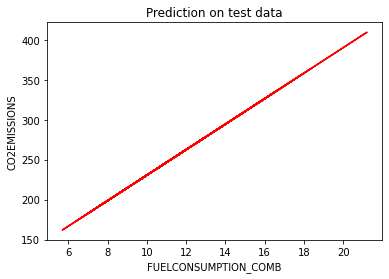

In [366]:
plt.plot(test_df["FUELCONSUMPTION_COMB"], predicted, c="red", label="prediction")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.title("Prediction on test data")

#### Writing predicted values in csv file:

In [367]:
output_prediction = pd.DataFrame(test_df["CO2EMISSIONS"])
output_prediction.iloc[:,:] = predicted.reshape(-1,1)
output_prediction


,CO2EMISSIONS
3,248.261254
20,230.721434
30,249.855783
42,281.746366
43,245.072196
...,...
1022,221.154259
1027,227.532375
1051,241.883138
1052,256.233900


In [368]:
output_prediction.to_csv("output_prediction.csv", index=True)